<a href="https://colab.research.google.com/github/sungjindo/NLP/blob/main/Copy_of_hsp_classification_FinTechTest_do.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**도성진**


## hate-speech data를 이용하여 적절히 선처리 하여 Transformer를 이용하여 classification
- huggingface에서 사용가능한 여러 한국어 모델을 사용할 것.
- kr-electra모델을 사용할 경우는    
model = ElectraForSequenceClassification.from_pretrained('snunlp/KR-ELECTRA-discriminator')
- 각자 알아서 적절히 한국어 데이터를 preprocessing 할 필요
- 아래에 주어진 cell에 따라 해도 되나, 자기의 방식대로 할 수 있음. 단 셀이나 코드에 필요한 설명을 주석처리하여 보여 줄 것. 채점시 의도를 파악할 수 있도록 
- 주피터노트북 파일명에 각자이름 붙일것: hsp_classification_FinTechTest_각자이름.ipynb
- 제출은 조교에게 (김은진( jyej3154@snu.ac.kr)), 메일제목은 Fintech_NLP_test_각자이름

## Set the directory

In [ ]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# 디렉토리 설정
resources = '/content/drive/MyDrive/NLP/'  ## 각자 저장공간

import os
os.chdir(resources)

In [ ]:
!dir

개념
BalancedNewsCorpusShuffled
Copy_of_hsp_classification_FinTechTest_도성진.ipynb
DeepLearningForNaturalLanguageProcessingWithPytorch.ipynb
education-learning-language-models-with-real-data-Entropy_FinTech.ipynb
EmbeddingsForNLP02WordEmbeddingsFinTech.ipynb
fasttext_morph_300.model
FromPretrainedWordEmbeddingsToPretrainedLMRefined.ipynb
IllustratedAttentionFull.ipynb
__MACOSX
NaturalLanguageProcessingIsFunCombined_FinTech.ipynb
실습_news_classification_rnncnn.ipynb
pytorch
pytorch-seq2seq
Seq2Seq_EncoderDecoderExpanded.ipynb
tansformer


## Download Dataset

In [ ]:
## 데이터 다운로드
#다운로드 받은 데이터는 이 코드와 같은 디렉토리에 있는 것으로 하여 코딩

!wget -nc https://raw.githubusercontent.com/kocohub/korean-hate-speech/master/labeled/train.tsv
!wget -nc https://raw.githubusercontent.com/kocohub/korean-hate-speech/master/labeled/dev.tsv

--2022-05-01 13:09:41--  https://raw.githubusercontent.com/kocohub/korean-hate-speech/master/labeled/train.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 913546 (892K) [text/plain]
Saving to: ‘train.tsv’

train.tsv           100%[===================>] 892.13K  --.-KB/s    in 0.03s   

2022-05-01 13:09:41 (27.2 MB/s) - ‘train.tsv’ saved [913546/913546]

--2022-05-01 13:09:41--  https://raw.githubusercontent.com/kocohub/korean-hate-speech/master/labeled/dev.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54903 (54K) [text/p

In [ ]:
#Load and Convert Data
import pandas as pd
train_dataset = pd.read_csv('train.tsv',delimiter='\t')
test_dataset = pd.read_csv('dev.tsv',delimiter='\t') 

print(len(train_dataset), len(test_dataset))

7896 471


In [ ]:
test_dataset  # hate label만 사용

,comments,contain_gender_bias,bias,hate
0,송중기 시대극은 믿고본다. 첫회 신선하고 좋았다.,False,none,none
1,지현우 나쁜놈,False,none,offensive
2,알바쓰고많이만들면되지 돈욕심없으면골목식당왜나온겨 기댕기게나하고 산에가서팔어라,False,none,hate
3,설마 ㅈ 현정 작가 아니지??,True,gender,hate
4,이미자씨 송혜교씨 돈이 그리 많으면 탈세말고 그돈으로 평소에 불우이웃에게 기부도 좀...,False,none,offensive
...,...,...,...,...
466,지현우 범죄 저지르지 않았나요?,False,none,offensive
467,여자인생 망칠 일 있나 ㅋㅋ,True,gender,hate
468,근데 전라도에서 사고가 났는데 굳이 서울까지 와서 병원에 가느 이유는?,False,others,offensive
469,"할매젖x, 뱃살x, 몸매 s라인, 유륜은 적당해야됨(너무크거나 너무 작아도 x), ...",True,gender,hate


In [ ]:
!nvidia-smi

Sun May  1 13:09:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Install Packages

In [ ]:
## 필요한 패키지 설치 예시 
!pip install transformers
!pip install --upgrade keras
!pip install --upgrade tensorflow

!pip install --ignore-installed hanja

     |████████████████████████████████| 4.0 MB 8.1 MB/s 
     |████████████████████████████████| 77 kB 8.1 MB/s 
     |████████████████████████████████| 6.6 MB 51.0 MB/s 
     |████████████████████████████████| 895 kB 61.2 MB/s 
     |████████████████████████████████| 596 kB 60.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 462 kB 7.0 MB/s 
     |████████████████████████████████| 120 kB 7.6 MB/s 
     |████████████████████████████████| 265 kB 62.5 MB/s 
     |████████████████████████████████| 297 kB 63.6 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 207 kB 71.6 MB/s 
     |████████████████████████████████| 61 kB 9.4 MB/s 
     |████████████████████████████████| 149 kB 65.4 MB/s 
     |████████████████████████████████| 138 kB 71.1 MB/s 
     |████████████████████████████████| 60 kB 9.

# 필요한 모둘 로드

In [ ]:
import os
import torch
import numpy as np
import pandas as pd

from transformers import Trainer, TrainingArguments
from transformers import ElectraForSequenceClassification, ElectraTokenizer
from transformers import BertForSequenceClassification, BertTokenizerFast

from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import numpy as np
from tqdm import tqdm, tqdm_notebook


#transformers
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [ ]:
# 시각화
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

rcParams['figure.figsize'] = 12, 8

# 분석
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict # defaultdict(list)
from textwrap import wrap

## Load hate Data & Process

### 원 데이터

![%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-04-27%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2012.57.01.png](attachment:%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-04-27%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2012.57.01.png)

### 본 과제에서는 hate label만 사용

![%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-04-27%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2012.59.20.png](attachment:%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-04-27%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2012.59.20.png)

## Preprocessing

In [ ]:
train_dataset.head()

,comments,contain_gender_bias,bias,hate
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,False,others,hate
1,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,False,none,none
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",False,none,hate
3,"1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데",False,none,none
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,True,gender,hate


In [ ]:
# 특수문자  제거
train_dataset['comments']= train_dataset['comments'].str.replace(pat=r'[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]',repl=r' ',regex=True)
test_dataset['comments']= test_dataset['comments'].str.replace(pat=r'[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]',repl=r' ',regex=True)


# 숫자 제거
train_dataset['comments']= train_dataset['comments'].str.replace(pat=r'[0-9]',repl=r' ',regex=True)
test_dataset['comments']= test_dataset['comments'].str.replace(pat=r'[0-9]',repl=r' ',regex=True)


In [ ]:
train_dataset = train_dataset[['comments','hate']]
test_dataset= test_dataset[['comments','hate']]

In [ ]:
train_dataset.head()

,comments,hate
0,현재 호텔주인 심정 아 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,hate
1,한국적인 미인의 대표적인 분 너무나 곱고아름다운모습 그모습뒤의 슬픔을...,none
2,못된 넘들 남의 고통을 즐겼던 넘들 이젠 마땅한 처벌을 받아야지 그래...,hate
3,화 어설펐는데 화 지나서부터는 갈수록 너무 재밌던데,none
4,사람 얼굴 손톱으로 긁은것은 인격살해이고 동영상이 몰카냐 메걸리안들 생각...,hate


## Load Model

In [ ]:
model = ElectraForSequenceClassification.from_pretrained('snunlp/KR-ELECTRA-discriminator',num_labels=3)
tokenizer = ElectraTokenizer.from_pretrained("snunlp/KR-ELECTRA-discriminator")

Downloading:   0%|          | 0.00/468 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at snunlp/KR-ELECTRA-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at snunlp/KR-ELECTRA-discriminator and are newly initialized: ['classifier.dense

Downloading:   0%|          | 0.00/209k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/56.0 [00:00<?, ?B/s]

In [ ]:
#GPU 사용
device = torch.device("cuda:0")

## Build Dataset

In [ ]:
labels = sorted(train_dataset.hate.unique())

label_dict = {}
for index, labels in enumerate(labels):
  label_dict[labels] = index
label_dict

{'hate': 0, 'none': 1, 'offensive': 2}

In [ ]:
train_dataset['labels'] = train_dataset.hate.replace(label_dict)

In [ ]:
labels = sorted(test_dataset.hate.unique())

label_dict = {}
for index, labels in enumerate(labels):
  label_dict[labels] = index
label_dict

{'hate': 0, 'none': 1, 'offensive': 2}

In [ ]:
test_dataset['labels'] = test_dataset.hate.replace(label_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#Make Dataset Class
class Electra_data(torch.utils.data.Dataset):
    def __init__(self, dataset, tokenizer):
        super().__init__()
        self.label = torch.tensor(dataset['labels']).long()
        features = tokenizer([str(x) for x in dataset.comments], padding=True, truncation=True,
                             max_length=128)
        
        self.input = torch.tensor(features['input_ids'])
        self.mask = torch.tensor(features['attention_mask'])
    
    def __len__(self):
        return len(self.input)

    def __getitem__(self, index):
        return {'input_ids': self.input[index], 'attention_mask': self.mask[index], 'label':self.label[index]}

In [ ]:
train_data = Electra_data(train_dataset, tokenizer)
test_data = Electra_data(test_dataset, tokenizer)

## Parameter setting

In [ ]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

  # 'micro': 각 샘플이나 예측에 동일한 가중치를 부여하고자 할 때 (accuracy)
  # 'macro': 모든 클래스에 동일한 가중치를 부여
  # 'weighted': 각 레이블이 불균형할 때 weight를 주어 계산. precision과 recall의 합이 아닌 F-score를 야기할 수 있음.
  # https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f#989c



    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
#Trainer
#Hyper parameters
#   각 step 저장
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3, 
    per_device_train_batch_size=64, # decrease batch size to avoid OOM error
    per_device_eval_batch_size=128,

    warmup_steps=500,
    save_steps=200,
    
    logging_dir='./logs',

    # learning_rate=2e-5,
    weight_decay=0.01,

    # evaluation_strategy="steps",
    # load_best_model_at_end = True
    # metric_for_best_model="accuracy",
    # dataloader_pin_memory=False, 
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_data,
    eval_dataset=test_data
)

## Train

In [ ]:
#Train Model
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 7896
  Num Epochs = 3
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 372


Step,Training Loss


Saving model checkpoint to ./results/checkpoint-200
Configuration saved in ./results/checkpoint-200/config.json
Model weights saved in ./results/checkpoint-200/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=372, training_loss=0.80995604812458, metrics={'train_runtime': 327.2237, 'train_samples_per_second': 72.391, 'train_steps_per_second': 1.137, 'total_flos': 986021644082832.0, 'train_loss': 0.80995604812458, 'epoch': 3.0})

## Evaluate

In [ ]:
#Evaluate Model
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 471
  Batch size = 128


{'epoch': 3.0,
 'eval_accuracy': 0.6518046709129511,
 'eval_f1': 0.6470825828102429,
 'eval_loss': 0.8256733417510986,
 'eval_precision': 0.6716300900209579,
 'eval_recall': 0.6762477592737156,
 'eval_runtime': 2.1023,
 'eval_samples_per_second': 224.037,
 'eval_steps_per_second': 1.903}

In [ ]:
# 나중을 위해 모델 저장
trainer.save_model('mbert.nsmc')

Saving model checkpoint to mbert.nsmc
Configuration saved in mbert.nsmc/config.json
Model weights saved in mbert.nsmc/pytorch_model.bin


In [ ]:
saved_model = ElectraForSequenceClassification.from_pretrained('mbert.nsmc')

loading configuration file mbert.nsmc/config.json
Model config ElectraConfig {
  "_name_or_path": "snunlp/KR-ELECTRA-discriminator",
  "architectures": [
    "ElectraForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "embedding_size": 768,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "electra",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "summary_activation": "gelu",
  "summary_last_dropout": 0.1,
  "summary_type": "first",
  "summary_use_proj": true,
  "torch_dtype": "float32",
  "transformers_ver

In [ ]:
#Get Predictions as Array
preds = trainer.predict(test_data)
print(preds)

***** Running Prediction *****
  Num examples = 471
  Batch size = 128


PredictionOutput(predictions=array([[-1.6708966 ,  3.0921743 , -0.7246937 ],
       [-0.04778157, -0.4746345 ,  0.4858447 ],
       [ 0.9894901 , -1.8440771 ,  0.65678865],
       ...,
       [-1.2415857 ,  0.87367743,  0.48799503],
       [ 2.3587885 , -2.0188055 , -0.6602561 ],
       [ 1.1501111 , -1.487949  ,  0.24372242]], dtype=float32), label_ids=array([1, 2, 0, 0, 2, 0, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 2, 1,
       2, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2,
       1, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1,
       2, 2, 1, 0, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 2,
       2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0,
       2, 1, 1, 0, 1, 0, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,

In [ ]:
#Argmax Softmax Values
predictions = np.argmax(preds[0], axis=1)
labels = preds[1]
print(predictions)
print(labels)

print(len(predictions), len(labels))

[1 2 0 2 2 0 1 1 1 1 1 2 1 2 2 2 0 0 2 1 2 0 1 0 1 1 0 0 1 0 1 2 1 2 1 2 2
 2 1 1 0 0 0 0 2 1 0 2 1 1 0 1 2 2 1 2 1 2 1 1 1 1 1 1 0 1 1 1 1 0 2 1 1 0
 1 1 1 0 1 2 1 2 0 1 1 1 1 1 1 0 1 1 1 1 0 0 2 0 0 0 0 0 2 2 2 0 0 1 1 2 1
 1 0 1 2 1 1 2 0 0 1 1 2 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0
 1 2 2 0 1 2 1 0 2 1 2 1 1 1 2 1 1 1 1 1 2 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1
 1 0 2 1 1 2 1 2 0 0 1 2 2 2 0 1 2 1 2 2 1 1 0 1 1 0 0 1 0 1 0 1 1 0 2 1 1
 1 2 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 2 0 1 2 2 1 1 0 1 1 2 1 0 1 1 1 1
 1 1 1 1 0 0 1 1 2 1 2 0 1 2 0 1 1 1 1 1 0 0 1 2 2 1 0 0 1 2 0 1 0 2 1 1 1
 1 1 2 2 1 0 2 1 2 1 1 1 2 1 0 1 2 1 0 1 2 1 1 0 0 0 2 1 2 2 1 0 0 0 2 2 1
 0 1 0 0 2 1 2 0 2 0 0 1 1 2 0 2 1 2 0 2 1 0 1 1 1 2 2 1 2 0 1 1 1 1 2 0 1
 2 1 0 2 1 1 2 1 0 1 0 2 1 1 1 1 1 0 2 0 0 0 1 1 2 0 2 1 1 2 1 1 1 0 2 2 1
 1 0 1 1 1 1 1 1 2 1 1 0 1 1 2 1 2 1 0 2 1 1 0 1 1 0 2 0 1 1 1 2 0 1 1 1 2
 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 2 2 1 1 2 1 0 0]
[1 2 0 0 2 0 1 1 2 2 1 0 1 2 2 2 0 0 0 2 2 1

[Text(81.5, 0.5, 'Observed'),
 Text(0.5, 45.5, 'Predicted'),
 Text(0.5, 1.0, 'Confusion Matrix')]

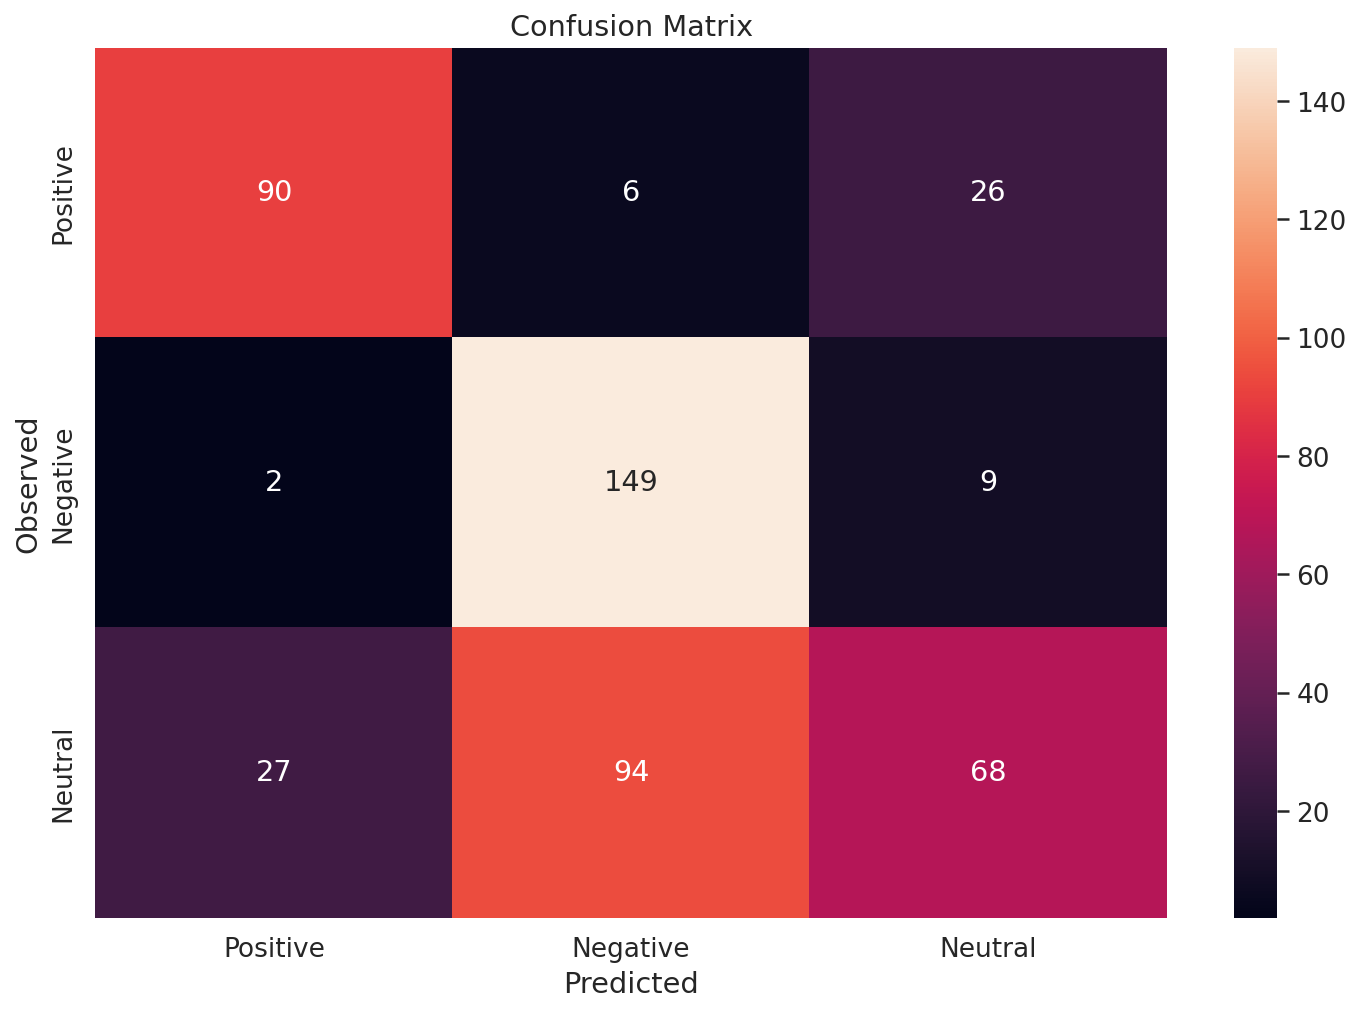

In [ ]:
#Confusion Matrix

cm = confusion_matrix(labels,predictions)
df_cm = pd.DataFrame(cm, index = ["Positive", "Negative",'Neutral'],
                  columns = ["Positive", "Negative",'Neutral'])
sn.heatmap(df_cm, annot=True, fmt=".0f").set(title="Confusion Matrix", xlabel="Predicted", ylabel="Observed",)

In [ ]:
# 원래 정답은 positive인데 negative로 잘못 예측한 경우
(labels == 1)&(predictions == 0)

NameError: ignored